 **IMPORT NECESSARY LIBRARIES**

In [99]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

**CARE MANAGEMENT**

In [100]:
care_management = pd.read_csv('data/care_management_anonymized.csv')
care_management.head(10)

,anon_ID,assistance_date,assistance_category,amount,unit,CommType,Party,InitiatedBy,Benefit_1,Assistance_1,Benefit_2,Assistance_2,Benefit_3,Assistance_3
0,531,2019-01-01 12:50:00,"Remote Contact with client (phone, email)",2.0,Minutes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,531,2019-01-02 07:30:00,"Remote Contact with client (phone, email)",2.0,Minutes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,581,2019-01-02 09:50:00,"Remote Contact with client (phone, email)",14.0,Minutes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,337,2019-01-02 10:10:00,"Remote Contact with client (phone, email)",1.0,Minutes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,254,2019-01-02 10:15:00,"Remote Contact with client (phone, email)",1.0,Minutes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,415,2019-01-02 10:15:00,"Remote Contact with client (phone, email)",1.0,Minutes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,72,2019-01-02 10:20:00,"Remote Contact with client (phone, email)",3.0,Minutes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,533,2019-01-02 10:25:00,ElderNet Office,5.0,Minutes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,592,2019-01-02 10:40:00,"Remote Contact with client (phone, email)",8.0,Minutes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,592,2019-01-02 10:45:00,"Remote Contact with client (phone, email)",2.0,Minutes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [101]:
care_management.tail(10)

,anon_ID,assistance_date,assistance_category,amount,unit,CommType,Party,InitiatedBy,Benefit_1,Assistance_1,Benefit_2,Assistance_2,Benefit_3,Assistance_3
12477,604,2021-09-07 15:30:00,"Remote Contact with client (phone, email)",5.0,Minutes,Call,Client,Other Party,Housing,Information,NaN,NaN,NaN,NaN
12478,197,2021-09-07 16:25:00,"Remote Contact with client (phone, email)",3.0,Minutes,Call,Client,ElderNet,Housing,Information,Financial,Information,NaN,NaN
12479,314,2021-09-07 16:30:00,"Remote Contact with client (phone, email)",5.0,Minutes,Call,Client,ElderNet,Housing,Coordination,NaN,NaN,NaN,NaN
12480,151,2021-09-09 10:00:00,Remote Contact w/o client,1.0,Minutes,Voice Message,Client,ElderNet,NaN,Support,NaN,NaN,NaN,NaN
12481,544,2021-09-09 10:30:00,"Remote Contact with client (phone, email)",2.0,Minutes,Call,Client,ElderNet,Financial,Enrollment,NaN,NaN,NaN,NaN
12482,434,2021-09-13 11:40:00,Remote Contact w/o client,1.0,Minutes,Call,Client,ElderNet,ElderNet,Coordination,NaN,NaN,NaN,NaN
12483,502,2021-09-15 09:35:00,"Remote Contact with client (phone, email)",7.0,Minutes,Call,Client,Other Party,NaN,NaN,NaN,NaN,NaN,NaN
12484,30,2021-09-15 10:55:00,"Remote Contact with client (phone, email)",18.0,Minutes,Call,Client,ElderNet,Food,Coordination,NaN,NaN,NaN,NaN
12485,406,2021-09-15 14:05:00,Remote Contact w/o client,1.0,Minutes,Call,Client,ElderNet,ElderNet,Coordination,NaN,NaN,NaN,NaN
12486,512,2021-09-15 18:05:00,"Remote Contact with client (phone, email)",10.0,Minutes,Call,Client,Other Party,Housing,Information,NaN,NaN,NaN,NaN


**CHECK FOR DUPLICATES IN CARE MANAGEMENT**

In [102]:
##CHECK FOR DUPLICATES IN CARE MANAGEMENT##
dup_cat = care_management.duplicated(subset=None, keep=False)
dup_cat

0        False
1        False
2        False
3        False
4        False
         ...  
12482    False
12483    False
12484    False
12485    False
12486    False
Length: 12487, dtype: bool

In [103]:
care_management.dtypes

anon_ID                  int64
assistance_date         object
assistance_category     object
amount                 float64
unit                    object
CommType                object
Party                   object
InitiatedBy             object
Benefit_1               object
Assistance_1            object
Benefit_2               object
Assistance_2            object
Benefit_3               object
Assistance_3            object
dtype: object

In [104]:
care_management.describe()

,anon_ID,amount
count,12487.000000,12487.000000
mean,334.148875,7.381176
std,197.931274,13.594129
min,1.000000,1.000000
25%,164.000000,1.000000
50%,340.000000,2.000000
75%,527.000000,7.000000
max,641.000000,183.000000


In [105]:
care_management.corr()

,anon_ID,amount
anon_ID,1.000000,-0.042936
amount,-0.042936,1.000000


In [106]:
care_management_null = care_management.isnull().sum()
care_management_null

anon_ID                    0
assistance_date            0
assistance_category        0
amount                     0
unit                       0
CommType                7819
Party                   7812
InitiatedBy             7842
Benefit_1               8427
Assistance_1            8361
Benefit_2              11896
Assistance_2           11899
Benefit_3              12403
Assistance_3           12404
dtype: int64

In [107]:
care_management_replace_null = care_management.fillna('N/A',inplace=True)
care_management_replace_null

In [108]:
care_management.nunique()

anon_ID                  490
assistance_date        10408
assistance_category        6
amount                   113
unit                       3
CommType                   9
Party                     12
InitiatedBy                7
Benefit_1                 18
Assistance_1              11
Benefit_2                 16
Assistance_2               9
Benefit_3                 17
Assistance_3               8
dtype: int64

In [109]:
care_management.head()

,anon_ID,assistance_date,assistance_category,amount,unit,CommType,Party,InitiatedBy,Benefit_1,Assistance_1,Benefit_2,Assistance_2,Benefit_3,Assistance_3
0,531,2019-01-01 12:50:00,"Remote Contact with client (phone, email)",2.0,Minutes,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A
1,531,2019-01-02 07:30:00,"Remote Contact with client (phone, email)",2.0,Minutes,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A
2,581,2019-01-02 09:50:00,"Remote Contact with client (phone, email)",14.0,Minutes,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A
3,337,2019-01-02 10:10:00,"Remote Contact with client (phone, email)",1.0,Minutes,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A
4,254,2019-01-02 10:15:00,"Remote Contact with client (phone, email)",1.0,Minutes,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A


In [110]:
#care_management['assistance_date'].unique()

In [111]:
care_management['assistance_category'].unique()

array(['Remote Contact with client (phone, email)', 'ElderNet Office',
       'Home Visit', 'Community', 'Remote Contact w/o client',
       'Internal Discussions'], dtype=object)

In [112]:
care_management['unit'].unique()

array(['Minutes', 'Dollars', 'Pounds'], dtype=object)

In [113]:
care_management['CommType'].unique()

array(['N/A', 'Text Message', 'Email', 'Voice Message', 'Call', 'Mail',
       'In Person', 'Video Call', ' '], dtype=object)

In [114]:
care_management['Party'].unique()

array(['N/A', 'Client', 'Service Provider', 'ElderNet', 'Family', 'Other',
       'Social Worker', 'Friend', 'Eldernet', 'Care Coordinator',
       'Care Manager', 'Clinet'], dtype=object)

In [115]:
 care_management.loc[:, "Party"] = care_management.Party.replace("Clinet", "Client")
 care_management['Party'].unique()

array(['N/A', 'Client', 'Service Provider', 'ElderNet', 'Family', 'Other',
       'Social Worker', 'Friend', 'Eldernet', 'Care Coordinator',
       'Care Manager'], dtype=object)

In [116]:
care_management['InitiatedBy'].unique()

array(['N/A', 'Other Party', 'ElderNet', 'Other party', 'Eldernet',
       'Client', 'Service Provider'], dtype=object)

In [117]:
care_management['Benefit_1'].unique()

array(['N/A', 'Medical', 'Transportation', 'ElderNet', 'Food', 'Housing',
       'Legal', 'Financial', 'Social', 'Utilities', 'Safety', 'ADL',
       'Eldernet', 'Telecommunication', 'Pets', 'Benefit_1',
       'Information', 'Pet'], dtype=object)

In [118]:
care_management.loc[:, "Benefit_1"] = care_management.Benefit_1.replace("Benefit_1", "Primary Benefits")

In [119]:
care_management['Benefit_1'].unique()

array(['N/A', 'Medical', 'Transportation', 'ElderNet', 'Food', 'Housing',
       'Legal', 'Financial', 'Social', 'Utilities', 'Safety', 'ADL',
       'Eldernet', 'Telecommunication', 'Pets', 'Primary Benefits',
       'Information', 'Pet'], dtype=object)

In [120]:
care_management['Benefit_2'].unique()

array(['N/A', 'ADL', 'Legal', 'Food', 'Medical', 'Financial', 'Safety',
       'ElderNet', 'Housing', 'Utilities', 'Eldernet',
       'Telecommunication', 'Transportation', 'Telecommunications',
       'Social', 'Coordination'], dtype=object)

In [121]:
care_management['Benefit_3'].unique()

array(['N/A', 'ElderNet', 'Transportation', 'Financial', 'Social', 'ADL',
       'Legal', 'Medical', 'Telecommunication', 'Food', 'Financial ',
       'Housing', 'Safety', 'Pets', 'Utilities', 'Support', 'Pet'],
      dtype=object)

In [122]:
care_management['Assistance_1'].unique()

array(['N/A', 'Information', 'Coordination', 'Support', 'Filing',
       'Enrollment', 'Referral', 'Continuation', 'Medical',
       'coordination', 'Facilitation'], dtype=object)

In [123]:
care_management['Assistance_2'].unique()

array(['N/A', 'Coordination', 'Information', 'Referral', 'Support',
       'Enrollment', 'Continuation', 'Filing', 'ElderNet'], dtype=object)

In [124]:
care_management['Assistance_3'].unique()

array(['N/A', 'Support', 'Information', 'Coordination', 'Enrollment',
       'Referral', 'Filing', 'Continuation'], dtype=object)

In [125]:
care_management.head(10)

,anon_ID,assistance_date,assistance_category,amount,unit,CommType,Party,InitiatedBy,Benefit_1,Assistance_1,Benefit_2,Assistance_2,Benefit_3,Assistance_3
0,531,2019-01-01 12:50:00,"Remote Contact with client (phone, email)",2.0,Minutes,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A
1,531,2019-01-02 07:30:00,"Remote Contact with client (phone, email)",2.0,Minutes,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A
2,581,2019-01-02 09:50:00,"Remote Contact with client (phone, email)",14.0,Minutes,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A
3,337,2019-01-02 10:10:00,"Remote Contact with client (phone, email)",1.0,Minutes,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A
4,254,2019-01-02 10:15:00,"Remote Contact with client (phone, email)",1.0,Minutes,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A
5,415,2019-01-02 10:15:00,"Remote Contact with client (phone, email)",1.0,Minutes,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A
6,72,2019-01-02 10:20:00,"Remote Contact with client (phone, email)",3.0,Minutes,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A
7,533,2019-01-02 10:25:00,ElderNet Office,5.0,Minutes,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A
8,592,2019-01-02 10:40:00,"Remote Contact with client (phone, email)",8.0,Minutes,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A
9,592,2019-01-02 10:45:00,"Remote Contact with client (phone, email)",2.0,Minutes,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A


In [126]:
care_management['Benefit_1'].unique()

array(['N/A', 'Medical', 'Transportation', 'ElderNet', 'Food', 'Housing',
       'Legal', 'Financial', 'Social', 'Utilities', 'Safety', 'ADL',
       'Eldernet', 'Telecommunication', 'Pets', 'Primary Benefits',
       'Information', 'Pet'], dtype=object)

**CLIENT INFO**

In [127]:
client_info = pd.read_csv('data/client_info_anonymized.csv')
client_info.head(10)

,anon_ID,county,poverty,minority,age_group
0,1,Montgomery,No,NaN,P
1,2,Montgomery,No,No,D
2,3,Montgomery,No,No,P
3,5,Montgomery,No,NaN,G
4,6,Montgomery,Yes,NaN,NaN
5,7,Montgomery,No,No,P
6,8,Montgomery,Yes,Yes,D
7,10,Montgomery,Yes,NaN,NaN
8,11,Montgomery,No,NaN,T
9,12,Montgomery,Yes,NaN,G


In [128]:
client_info.tail(5)

,anon_ID,county,poverty,minority,age_group
636,389,Other,NaN,Yes,NaN
637,602,Other,NaN,No,NaN
638,166,Other,NaN,No,NaN
639,638,Other,NaN,NaN,NaN
640,81,Other,NaN,NaN,NaN


In [129]:
client_info.dtypes

anon_ID       int64
county       object
poverty      object
minority     object
age_group    object
dtype: object

In [130]:
client_info.describe()

,anon_ID
count,641.000000
mean,321.000000
std,185.185043
min,1.000000
25%,161.000000
50%,321.000000
75%,481.000000
max,641.000000


In [131]:
client_null = client_info.isnull().sum()
client_null

anon_ID        0
county         0
poverty       40
minority     485
age_group    217
dtype: int64

In [132]:
client_info_replace_null = client_info.fillna('N/A',inplace=True)
client_info_replace_null

In [133]:
client_info.head(10)

,anon_ID,county,poverty,minority,age_group
0,1,Montgomery,No,N/A,P
1,2,Montgomery,No,No,D
2,3,Montgomery,No,No,P
3,5,Montgomery,No,N/A,G
4,6,Montgomery,Yes,N/A,N/A
5,7,Montgomery,No,No,P
6,8,Montgomery,Yes,Yes,D
7,10,Montgomery,Yes,N/A,N/A
8,11,Montgomery,No,N/A,T
9,12,Montgomery,Yes,N/A,G


In [134]:
client_info['county'].unique()

array(['Montgomery', 'Other'], dtype=object)

In [135]:
client_info['poverty'].unique()

array(['No', 'Yes', 'N/A'], dtype=object)

In [136]:
client_info['minority'].unique()

array(['N/A', 'No', 'Yes'], dtype=object)

In [137]:
client_info['age_group'].unique()

array(['P', 'D', 'G', 'N/A', 'T'], dtype=object)

**PANTRY**

In [138]:
pantry_info = pd.read_csv('data/pantry_anonymized.csv')
pantry_info.head(10)

,anon_ID,assistance_date,assistance_category,amount,unit
0,102,1/3/2019 10:00,Food Pantry: Food Pantry Poundage,25,Pounds
1,178,1/3/2019 10:00,Food Pantry: Food Pantry Poundage,25,Pounds
2,588,1/3/2019 10:30,Food Pantry: Food Pantry Poundage,25,Pounds
3,502,1/3/2019 11:15,Food Pantry: Food Pantry Poundage,25,Pounds
4,232,1/3/2019 11:30,Food Pantry: Food Pantry Poundage,25,Pounds
5,361,1/3/2019 11:40,Food Pantry: Food Pantry Poundage,25,Pounds
6,361,1/3/2019 11:40,Food Pantry: Food Pantry Poundage,25,Pounds
7,478,1/3/2019 11:55,Food Pantry: Food Pantry Poundage,25,Pounds
8,599,1/3/2019 12:45,Food Pantry: Food Pantry Poundage,25,Pounds
9,122,1/3/2019 13:00,Food Pantry: Food Pantry Poundage,25,Pounds


In [139]:
pantry_dup = pantry_info.duplicated()
pantry_dup

0       False
1       False
2       False
3       False
4       False
        ...  
6268    False
6269    False
6270    False
6271    False
6272    False
Length: 6273, dtype: bool

In [140]:
pantry_info.shape

(6273, 5)

In [141]:
pantry_info.dtypes

anon_ID                 int64
assistance_date        object
assistance_category    object
amount                  int64
unit                   object
dtype: object

In [142]:
#pantry_info.describe()

In [143]:
pantry_null= pantry_info.isnull().sum()
pantry_null

anon_ID                0
assistance_date        0
assistance_category    0
amount                 0
unit                   0
dtype: int64

In [144]:
pantry_info.head()

,anon_ID,assistance_date,assistance_category,amount,unit
0,102,1/3/2019 10:00,Food Pantry: Food Pantry Poundage,25,Pounds
1,178,1/3/2019 10:00,Food Pantry: Food Pantry Poundage,25,Pounds
2,588,1/3/2019 10:30,Food Pantry: Food Pantry Poundage,25,Pounds
3,502,1/3/2019 11:15,Food Pantry: Food Pantry Poundage,25,Pounds
4,232,1/3/2019 11:30,Food Pantry: Food Pantry Poundage,25,Pounds


In [145]:
pantry_info.corr()

,anon_ID,amount
anon_ID,1.000000,0.021903
amount,0.021903,1.000000


In [146]:
pantry_info['assistance_category'].unique()

array(['Food Pantry: Food Pantry Poundage',
       'Food Pantry: Easter Outreach', 'Food Pantry: Holiday Baskets'],
      dtype=object)

In [147]:
pantry_info['amount'].unique()

array([ 25,   4,  30,   1,  10,  50,  20,  15,  40,  75, 100], dtype=int64)

In [148]:
pantry_info['unit'].unique()

array(['Pounds', 'Boxes/Bags', 'Dollars'], dtype=object)

In [149]:
pantry_info['assistance_date'].unique

<bound method Series.unique of 0       1/3/2019 10:00
1       1/3/2019 10:00
2       1/3/2019 10:30
3       1/3/2019 11:15
4       1/3/2019 11:30
             ...      
6268    9/7/2021 14:15
6269    9/7/2021 14:55
6270    9/7/2021 15:00
6271    9/7/2021 15:15
6272    9/9/2021 14:25
Name: assistance_date, Length: 6273, dtype: object>

**VOLUNTEER SERVICES**

In [150]:
volunteer_services = pd.read_csv('data/volunteer_services_anonymized.csv')
volunteer_services.head(10)

,anon_ID,rider_first_ride_date,rider_last_ride_date,rider_num_rides,appt_date,appt_duration,category
0,276,2015-04-27,2021-11-16,0,9/15/2021,2.00,Doctor Appt
1,276,2015-04-27,2021-11-16,0,9/1/2021,2.00,Doctor Appt
2,276,2015-04-27,2021-11-16,0,8/26/2021,2.00,Doctor Appt
3,276,2015-04-27,2021-11-16,0,8/11/2021,2.00,Doctor Appt
4,276,2015-04-27,2021-11-16,0,8/10/2021,2.25,Doctor Appt
5,276,2015-04-27,2021-11-16,0,8/9/2021,2.00,Doctor Appt
6,276,2015-04-27,2021-11-16,0,8/6/2021,2.00,Doctor Appt
7,276,2015-04-27,2021-11-16,0,8/5/2021,2.25,Doctor Appt
8,276,2015-04-27,2021-11-16,0,7/27/2021,2.25,Doctor Appt
9,276,2015-04-27,2021-11-16,0,7/21/2021,2.00,Doctor Appt


In [151]:
volunteer_services.tail(5)

,anon_ID,rider_first_ride_date,rider_last_ride_date,rider_num_rides,appt_date,appt_duration,category
4920,81,2015-05-01,2020-02-24,0,1/14/2019,2.0,Special Projects
4921,81,2015-05-01,2020-02-24,0,1/14/2019,2.0,Special Projects
4922,81,2015-05-01,2020-02-24,0,1/14/2019,7.0,Special Projects
4923,81,2015-05-01,2020-02-24,0,1/14/2019,3.0,Special Projects
4924,81,2015-05-01,2020-02-24,0,1/14/2019,2.0,Special Projects


In [152]:
volunteer_services.shape

(4925, 7)

In [153]:
volunteer_services.dtypes

anon_ID                    int64
rider_first_ride_date     object
rider_last_ride_date      object
rider_num_rides            int64
appt_date                 object
appt_duration            float64
category                  object
dtype: object

In [154]:
# Datetime conversion using astype:
volunteer_services['rider_last_ride_date'] = volunteer_services['rider_last_ride_date'].astype('datetime64[ns]')
volunteer_services['rider_first_ride_date'] = volunteer_services['rider_first_ride_date'].astype('datetime64[ns]')


volunteer_services['Days'] = (volunteer_services['rider_last_ride_date'] - volunteer_services['rider_first_ride_date']).dt.days

In [155]:
volunteer_services.dtypes

anon_ID                           int64
rider_first_ride_date    datetime64[ns]
rider_last_ride_date     datetime64[ns]
rider_num_rides                   int64
appt_date                        object
appt_duration                   float64
category                         object
Days                              int64
dtype: object

In [156]:
volunteer_services.head()

,anon_ID,rider_first_ride_date,rider_last_ride_date,rider_num_rides,appt_date,appt_duration,category,Days
0,276,2015-04-27,2021-11-16,0,9/15/2021,2.00,Doctor Appt,2395
1,276,2015-04-27,2021-11-16,0,9/1/2021,2.00,Doctor Appt,2395
2,276,2015-04-27,2021-11-16,0,8/26/2021,2.00,Doctor Appt,2395
3,276,2015-04-27,2021-11-16,0,8/11/2021,2.00,Doctor Appt,2395
4,276,2015-04-27,2021-11-16,0,8/10/2021,2.25,Doctor Appt,2395


In [157]:
volunteer_services.describe()

,anon_ID,rider_num_rides,appt_duration,Days
count,4925.000000,4925.0,4925.000000,4925.000000
mean,329.857462,0.0,3.165279,1762.247716
std,187.983010,0.0,5.648763,677.825455
min,2.000000,0.0,0.000000,0.000000
25%,166.000000,0.0,2.000000,1309.000000
50%,297.000000,0.0,2.000000,2100.000000
75%,505.000000,0.0,3.000000,2313.000000
max,641.000000,0.0,200.000000,2425.000000


In [158]:
volunteer_services_null = volunteer_services.isnull().sum()
volunteer_services_null

anon_ID                  0
rider_first_ride_date    0
rider_last_ride_date     0
rider_num_rides          0
appt_date                0
appt_duration            0
category                 0
Days                     0
dtype: int64

In [159]:
volunteer_services.head()

,anon_ID,rider_first_ride_date,rider_last_ride_date,rider_num_rides,appt_date,appt_duration,category,Days
0,276,2015-04-27,2021-11-16,0,9/15/2021,2.00,Doctor Appt,2395
1,276,2015-04-27,2021-11-16,0,9/1/2021,2.00,Doctor Appt,2395
2,276,2015-04-27,2021-11-16,0,8/26/2021,2.00,Doctor Appt,2395
3,276,2015-04-27,2021-11-16,0,8/11/2021,2.00,Doctor Appt,2395
4,276,2015-04-27,2021-11-16,0,8/10/2021,2.25,Doctor Appt,2395


In [160]:
volunteer_services['anon_ID'].unique()

array([276, 529, 607, 540,  78, 198, 113, 480, 390, 516,  18, 421,   7,
       641, 631, 100,  75, 231, 146, 192, 372, 532,   8,  92, 103,  14,
       554, 296, 327,   9, 332,  71, 210, 314, 414, 208, 347, 225, 128,
       620, 598, 626, 452, 139, 523, 239, 167, 249, 634, 603, 436, 457,
       483,  15, 340, 609, 317, 188, 117, 336, 472, 194,  53, 297, 144,
       416, 538, 285, 614, 168, 588, 508,   4, 156, 308, 530, 502, 387,
       604,   3, 561,  38, 410, 476, 548, 383, 520, 268, 189, 528, 150,
       120, 625, 228,  41, 211, 475, 469,   2, 334, 496,  72, 454, 361,
       504, 380, 402, 237, 597, 486,  42, 222, 420, 449, 377, 629, 304,
       501, 173, 582,  33, 593, 333, 368, 324, 264, 155, 184, 209, 256,
       346, 316, 630, 272, 287, 505, 279, 406, 341, 382, 299, 143, 463,
       132, 203, 250, 320, 313, 423, 535, 552, 172,  91, 426, 389, 586,
        24, 374, 602, 166, 638,  81], dtype=int64)

In [161]:
volunteer_services['category'].unique()

array(['Doctor Appt', 'Errands', 'Shopping', 'Friendly Visit',
       'Skilled Work', 'Telephone Reassurance', 'Odd Jobs', 'Yard Work',
       'Pantry Delivery', 'Special Projects', 'Pantry',
       'Board or Committee Mtg'], dtype=object)

**DONATIONS**

In [162]:
donations = pd.read_csv('data/donations_anonymized.csv')
donations.head(10)

,anon_donor_id,zip,status,do_not_mail,do_not_call,organisation,date,amount,form,campaign,target
0,92,19003.0,Active,False,False,N,01/01/2019,40.0,Check,Clients,Gift
1,321,19096.0,Active,False,False,N,01/02/2019,25.0,Check,Fall Towns,Gift
2,559,19146.0,Active,False,False,N,01/02/2019,250.0,Check,Fall Towns,Gift
3,926,19041.0,Active,False,False,N,01/03/2019,50.0,Check,Fall Towns,Gift
4,860,10038.0,Active,False,False,N,01/04/2019,165.0,Check,Misc,Gift
5,956,19003.0,Active,False,False,N,01/07/2019,32.0,Check,Fall Towns,Gift
6,835,19072.0,Active,False,False,N,01/07/2019,100.0,Check,Board,Gift
7,119,19041.0,Active,False,False,N,01/08/2019,100.0,Check,Board,Gift
8,485,19041.0,Active,False,False,N,01/09/2019,50.0,Check,Fall Towns,Gift
9,192,19403.0,Active,False,False,N,01/09/2019,1000.0,Check,Corporatio,Gift


In [163]:
donations.tail(5)

,anon_donor_id,zip,status,do_not_mail,do_not_call,organisation,date,amount,form,campaign,target
2185,330,19103.0,Active,False,False,N,09/02/2021,150.0,Check,Misc,Gift
2186,197,19073.0,Active,False,False,N,09/05/2021,200.0,Check,Misc,Gift
2187,592,19003.0,Active,False,False,N,09/14/2021,75.0,Check,Sprg Evt,Gift
2188,835,19072.0,Active,False,False,N,09/14/2021,20.0,Check,Board,Gift
2189,220,19096.0,Active,False,False,N,11/01/5005,10.0,Check,Fall Towns,Gift


In [164]:
donations.shape

(2190, 11)

In [165]:
donations.dtypes

anon_donor_id      int64
zip              float64
status            object
do_not_mail         bool
do_not_call         bool
organisation      object
date              object
amount           float64
form              object
campaign          object
target            object
dtype: object

In [166]:
# Datetime conversion using astype:

#donations['date'] = donations['date'].apply(lambda x: pd.Period(x, freq='ms'))



In [167]:
donations['zip'] = donations['zip'].astype(str)

In [168]:
donations.dtypes

anon_donor_id      int64
zip               object
status            object
do_not_mail         bool
do_not_call         bool
organisation      object
date              object
amount           float64
form              object
campaign          object
target            object
dtype: object

In [169]:
(donations['date'] >= '01/01/2019') & (donations['date'] <='12/31/2019')


#mask = (df['birth_date'] > start_date) & (df['birth_date'] <= end_date)

0       True
1       True
2       True
3       True
4       True
        ... 
2185    True
2186    True
2187    True
2188    True
2189    True
Name: date, Length: 2190, dtype: bool

In [170]:
donations.describe()

,anon_donor_id,amount
count,2190.000000,2190.000000
mean,541.318721,580.851689
std,308.338311,4709.648077
min,1.000000,0.000000
25%,268.250000,40.000000
50%,559.000000,100.000000
75%,815.000000,150.000000
max,1058.000000,186092.000000


In [171]:
donations_null = donations.isnull().sum()
donations_null

anon_donor_id    0
zip              0
status           1
do_not_mail      0
do_not_call      0
organisation     0
date             0
amount           0
form             1
campaign         0
target           0
dtype: int64

In [172]:
donations_replace_null = donations.fillna('N/A',inplace=True)
donations_replace_null

In [173]:
donations.head(10)

,anon_donor_id,zip,status,do_not_mail,do_not_call,organisation,date,amount,form,campaign,target
0,92,19003.0,Active,False,False,N,01/01/2019,40.0,Check,Clients,Gift
1,321,19096.0,Active,False,False,N,01/02/2019,25.0,Check,Fall Towns,Gift
2,559,19146.0,Active,False,False,N,01/02/2019,250.0,Check,Fall Towns,Gift
3,926,19041.0,Active,False,False,N,01/03/2019,50.0,Check,Fall Towns,Gift
4,860,10038.0,Active,False,False,N,01/04/2019,165.0,Check,Misc,Gift
5,956,19003.0,Active,False,False,N,01/07/2019,32.0,Check,Fall Towns,Gift
6,835,19072.0,Active,False,False,N,01/07/2019,100.0,Check,Board,Gift
7,119,19041.0,Active,False,False,N,01/08/2019,100.0,Check,Board,Gift
8,485,19041.0,Active,False,False,N,01/09/2019,50.0,Check,Fall Towns,Gift
9,192,19403.0,Active,False,False,N,01/09/2019,1000.0,Check,Corporatio,Gift


In [174]:
average_donations = donations['amount'].mean()
average_donations

580.851689497717

In [175]:
donations_analysis = donations.drop(['form', 'target', 'status', 'do_not_call', 'do_not_mail', 'anon_donor_id'], axis=1)
donations_analysis

,zip,organisation,date,amount,campaign
0,19003.0,N,01/01/2019,40.0,Clients
1,19096.0,N,01/02/2019,25.0,Fall Towns
2,19146.0,N,01/02/2019,250.0,Fall Towns
3,19041.0,N,01/03/2019,50.0,Fall Towns
4,10038.0,N,01/04/2019,165.0,Misc
...,...,...,...,...,...
2185,19103.0,N,09/02/2021,150.0,Misc
2186,19073.0,N,09/05/2021,200.0,Misc
2187,19003.0,N,09/14/2021,75.0,Sprg Evt
2188,19072.0,N,09/14/2021,20.0,Board


In [176]:
donations.loc[:, "campaign"] = donations.campaign.replace("Corporati", "Corporation")

In [177]:
donations_analysis['campaign'].unique()

array(['Clients', 'Fall Towns', 'Misc', 'Board', 'Corporatio', 'Mem-hon',
       'Foundation', 'Emerg fund', 'Escort Dri', 'D.Young Fu', 'Sprg Evt',
       'Church', 'CAC', 'AMCRC', 'Newsletter', 'Special Pr', 'Grants',
       'United Way', 'In-Kind', 'In/Out'], dtype=object)

In [178]:
#add csv file to dataframe
#df = pd.DataFrame({'Subject': ['English', 'Maths', 'Science'], 'Mean': [90, 87, 67]})

#create bar graph
#bargraph = donations_analysis.plot.bar(x = 'zip', y = 'amount', fontsize='8')

#donations['campaign'].unique()
client_donations = donations_analysis[donations_analysis['campaign'] == "Clients"]
client_donations.mean()

C:\Users\Cynthia\AppData\Local\Temp/ipykernel_13884/349692737.py:9: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  client_donations.mean()


amount    42.884058
dtype: float64

In [179]:
client_donations = donations_analysis[donations_analysis['campaign'] == "United Way"]
client_donations
client_donations.mean()

C:\Users\Cynthia\AppData\Local\Temp/ipykernel_13884/3022827133.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  client_donations.mean()


amount    59.083333
dtype: float64

In [180]:
client_donations = donations_analysis[donations_analysis['campaign'] == "Fall Towns"]
client_donations
client_donations.mean()

C:\Users\Cynthia\AppData\Local\Temp/ipykernel_13884/1609190662.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  client_donations.mean()


amount    140.708684
dtype: float64

In [181]:
client_donations = donations_analysis[donations_analysis['campaign'] == "Misc"]
client_donations
client_donations.mean()

C:\Users\Cynthia\AppData\Local\Temp/ipykernel_13884/395589035.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  client_donations.mean()


amount    1552.929648
dtype: float64

In [182]:
client_donations = donations_analysis[donations_analysis['campaign'] == "Board"]
client_donations
client_donations.mean()

C:\Users\Cynthia\AppData\Local\Temp/ipykernel_13884/2494756643.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  client_donations.mean()


amount    301.463415
dtype: float64

In [183]:
client_donations = donations_analysis[donations_analysis['campaign'] == "Corporation"]
client_donations
client_donations.mean()

zip             NaN
organisation    NaN
date            NaN
amount          NaN
campaign        NaN
dtype: object

In [184]:
client_donations = donations_analysis[donations_analysis['campaign'] == "Mem-hon"]
client_donations
client_donations.mean()

C:\Users\Cynthia\AppData\Local\Temp/ipykernel_13884/3770346985.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  client_donations.mean()


amount    254.425
dtype: float64

In [185]:
client_donations = donations_analysis[donations_analysis['campaign'] == "Foundation"]
client_donations
client_donations.mean()

C:\Users\Cynthia\AppData\Local\Temp/ipykernel_13884/3662407945.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  client_donations.mean()


amount    5629.864407
dtype: float64

In [186]:
client_donations = donations_analysis[donations_analysis['campaign'] == "Emerg fund"]
client_donations
client_donations.mean()

C:\Users\Cynthia\AppData\Local\Temp/ipykernel_13884/1395538395.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  client_donations.mean()


amount    1026.990846
dtype: float64

In [187]:
client_donations = donations_analysis[donations_analysis['campaign'] == "Escort Dri"]
client_donations
client_donations.mean()

C:\Users\Cynthia\AppData\Local\Temp/ipykernel_13884/715798201.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  client_donations.mean()


amount    536.184211
dtype: float64

**DONATIONS COLUMN ANALYSIS**

In [188]:
#donations['do_not_mail'].unique()

In [189]:
#donations['do_not_call'].unique()

In [190]:
donations['campaign'].unique()

array(['Clients', 'Fall Towns', 'Misc', 'Board', 'Corporatio', 'Mem-hon',
       'Foundation', 'Emerg fund', 'Escort Dri', 'D.Young Fu', 'Sprg Evt',
       'Church', 'CAC', 'AMCRC', 'Newsletter', 'Special Pr', 'Grants',
       'United Way', 'In-Kind', 'In/Out'], dtype=object)

In [191]:
donations.loc[:, "campaign"] = donations.campaign.replace("Corporati", "Corporation")

In [192]:
donations['campaign'].unique()

array(['Clients', 'Fall Towns', 'Misc', 'Board', 'Corporatio', 'Mem-hon',
       'Foundation', 'Emerg fund', 'Escort Dri', 'D.Young Fu', 'Sprg Evt',
       'Church', 'CAC', 'AMCRC', 'Newsletter', 'Special Pr', 'Grants',
       'United Way', 'In-Kind', 'In/Out'], dtype=object)

In [193]:
donations['target'].unique()

array(['Gift'], dtype=object)

In [194]:
#donations['form'].unique()

In [195]:
#donations['status'].unique()

In [196]:
donations['campaign'].unique()

array(['Clients', 'Fall Towns', 'Misc', 'Board', 'Corporatio', 'Mem-hon',
       'Foundation', 'Emerg fund', 'Escort Dri', 'D.Young Fu', 'Sprg Evt',
       'Church', 'CAC', 'AMCRC', 'Newsletter', 'Special Pr', 'Grants',
       'United Way', 'In-Kind', 'In/Out'], dtype=object)

In [197]:
#donations['organisation'].unique()

In [198]:
#donations['date'].unique()

In [199]:
#donations['amount'].unique()

In [200]:
#JOIN CLIENT INFO AND CARE MANAGEMENT

client_care = pd.merge(client_info, care_management, on="anon_ID")
client_care.head(10)

,anon_ID,county,poverty,minority,age_group,assistance_date,assistance_category,amount,unit,CommType,Party,InitiatedBy,Benefit_1,Assistance_1,Benefit_2,Assistance_2,Benefit_3,Assistance_3
0,1,Montgomery,No,N/A,P,2021-06-22 15:20:00,"Remote Contact with client (phone, email)",25.0,Minutes,Call,Client,ElderNet,N/A,Enrollment,Housing,Coordination,N/A,N/A
1,1,Montgomery,No,N/A,P,2021-07-19 14:15:00,"Remote Contact with client (phone, email)",2.0,Minutes,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A
2,2,Montgomery,No,No,D,2019-06-04 10:10:00,Community,2.0,Minutes,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A
3,2,Montgomery,No,No,D,2020-01-27 10:20:00,"Remote Contact with client (phone, email)",1.0,Minutes,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A
4,2,Montgomery,No,No,D,2020-05-01 16:35:00,"Remote Contact with client (phone, email)",3.0,Minutes,Call,Client,Eldernet,Eldernet,Coordination,N/A,N/A,N/A,N/A
5,3,Montgomery,No,No,P,2019-07-17 10:55:00,"Remote Contact with client (phone, email)",4.0,Minutes,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A
6,3,Montgomery,No,No,P,2019-07-26 10:40:00,Home Visit,38.0,Minutes,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A
7,3,Montgomery,No,No,P,2019-07-26 13:05:00,"Remote Contact with client (phone, email)",7.0,Minutes,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A
8,3,Montgomery,No,No,P,2020-04-10 16:20:00,"Remote Contact with client (phone, email)",3.0,Minutes,Call,Client,ElderNet,ElderNet,Support,N/A,N/A,N/A,N/A
9,5,Montgomery,No,N/A,G,2019-12-26 13:30:00,Community,13.0,Minutes,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A


In [201]:
client_care.dtypes

anon_ID                  int64
county                  object
poverty                 object
minority                object
age_group               object
assistance_date         object
assistance_category     object
amount                 float64
unit                    object
CommType                object
Party                   object
InitiatedBy             object
Benefit_1               object
Assistance_1            object
Benefit_2               object
Assistance_2            object
Benefit_3               object
Assistance_3            object
dtype: object

In [202]:
#JOIN CLIENT INFO AND VOLUNTEER SERVICES

client_volunteer = pd.merge(client_info, volunteer_services, on="anon_ID")
client_volunteer.head(10)

,anon_ID,county,poverty,minority,age_group,rider_first_ride_date,rider_last_ride_date,rider_num_rides,appt_date,appt_duration,category,Days
0,2,Montgomery,No,No,D,2015-11-10,2021-05-11,0,5/11/2021,2.0,Doctor Appt,2009
1,2,Montgomery,No,No,D,2015-11-10,2021-05-11,0,5/3/2021,2.0,Doctor Appt,2009
2,2,Montgomery,No,No,D,2015-11-10,2021-05-11,0,4/22/2021,2.0,Doctor Appt,2009
3,2,Montgomery,No,No,D,2015-11-10,2021-05-11,0,4/21/2021,2.0,Doctor Appt,2009
4,2,Montgomery,No,No,D,2015-11-10,2021-05-11,0,4/19/2021,2.0,Doctor Appt,2009
5,2,Montgomery,No,No,D,2015-11-10,2021-05-11,0,4/16/2021,2.0,Doctor Appt,2009
6,2,Montgomery,No,No,D,2015-11-10,2021-05-11,0,4/13/2021,2.0,Doctor Appt,2009
7,2,Montgomery,No,No,D,2015-11-10,2021-05-11,0,4/13/2021,2.0,Doctor Appt,2009
8,2,Montgomery,No,No,D,2015-11-10,2021-05-11,0,4/9/2021,2.0,Doctor Appt,2009
9,2,Montgomery,No,No,D,2015-11-10,2021-05-11,0,4/8/2021,2.0,Doctor Appt,2009


In [203]:
#JOIN CLIENT INFO AND PANTRY

client_pantry = pd.merge(client_info, pantry_info, on="anon_ID")
client_pantry.head(10)

,anon_ID,county,poverty,minority,age_group,assistance_date,assistance_category,amount,unit
0,2,Montgomery,No,No,D,2/28/2019 13:15,Food Pantry: Food Pantry Poundage,25,Pounds
1,2,Montgomery,No,No,D,4/11/2019 13:15,Food Pantry: Food Pantry Poundage,25,Pounds
2,2,Montgomery,No,No,D,5/7/2019 13:15,Food Pantry: Food Pantry Poundage,25,Pounds
3,2,Montgomery,No,No,D,6/4/2019 13:15,Food Pantry: Food Pantry Poundage,25,Pounds
4,2,Montgomery,No,No,D,7/9/2019 10:12,Food Pantry: Food Pantry Poundage,25,Pounds
5,2,Montgomery,No,No,D,8/15/2019 10:47,Food Pantry: Food Pantry Poundage,25,Pounds
6,2,Montgomery,No,No,D,10/1/2019 11:11,Food Pantry: Food Pantry Poundage,25,Pounds
7,2,Montgomery,No,No,D,11/7/2019 12:00,Food Pantry: Food Pantry Poundage,25,Pounds
8,2,Montgomery,No,No,D,11/22/2019 14:00,Food Pantry: Holiday Baskets,30,Pounds
9,2,Montgomery,No,No,D,12/23/2019 1:25,Food Pantry: Holiday Baskets,30,Pounds


In [204]:
#JOIN CARE MANAGEMENT AND VOLUNTEER SERVICES

care_volunteer = pd.merge(care_management, volunteer_services, on="anon_ID")
care_volunteer.head(10)

,anon_ID,assistance_date,assistance_category,amount,unit,CommType,Party,InitiatedBy,Benefit_1,Assistance_1,...,Assistance_2,Benefit_3,Assistance_3,rider_first_ride_date,rider_last_ride_date,rider_num_rides,appt_date,appt_duration,category,Days
0,72,2019-01-02 10:20:00,"Remote Contact with client (phone, email)",3.0,Minutes,N/A,N/A,N/A,N/A,N/A,...,N/A,N/A,N/A,2018-03-01,2021-09-30,0,9/10/2021,2.0,Doctor Appt,1309
1,72,2019-01-02 10:20:00,"Remote Contact with client (phone, email)",3.0,Minutes,N/A,N/A,N/A,N/A,N/A,...,N/A,N/A,N/A,2018-03-01,2021-09-30,0,7/29/2021,2.0,Doctor Appt,1309
2,72,2019-01-02 10:20:00,"Remote Contact with client (phone, email)",3.0,Minutes,N/A,N/A,N/A,N/A,N/A,...,N/A,N/A,N/A,2018-03-01,2021-09-30,0,7/7/2021,2.0,Doctor Appt,1309
3,72,2019-01-02 10:20:00,"Remote Contact with client (phone, email)",3.0,Minutes,N/A,N/A,N/A,N/A,N/A,...,N/A,N/A,N/A,2018-03-01,2021-09-30,0,6/28/2021,2.0,Doctor Appt,1309
4,72,2019-01-02 10:20:00,"Remote Contact with client (phone, email)",3.0,Minutes,N/A,N/A,N/A,N/A,N/A,...,N/A,N/A,N/A,2018-03-01,2021-09-30,0,6/10/2021,2.0,Doctor Appt,1309
5,72,2019-01-02 10:20:00,"Remote Contact with client (phone, email)",3.0,Minutes,N/A,N/A,N/A,N/A,N/A,...,N/A,N/A,N/A,2018-03-01,2021-09-30,0,5/27/2021,2.0,Doctor Appt,1309
6,72,2019-01-02 10:20:00,"Remote Contact with client (phone, email)",3.0,Minutes,N/A,N/A,N/A,N/A,N/A,...,N/A,N/A,N/A,2018-03-01,2021-09-30,0,5/21/2021,2.0,Doctor Appt,1309
7,72,2019-01-02 10:20:00,"Remote Contact with client (phone, email)",3.0,Minutes,N/A,N/A,N/A,N/A,N/A,...,N/A,N/A,N/A,2018-03-01,2021-09-30,0,5/18/2021,2.0,Doctor Appt,1309
8,72,2019-01-02 10:20:00,"Remote Contact with client (phone, email)",3.0,Minutes,N/A,N/A,N/A,N/A,N/A,...,N/A,N/A,N/A,2018-03-01,2021-09-30,0,4/13/2021,2.0,Doctor Appt,1309
9,72,2019-01-02 10:20:00,"Remote Contact with client (phone, email)",3.0,Minutes,N/A,N/A,N/A,N/A,N/A,...,N/A,N/A,N/A,2018-03-01,2021-09-30,0,3/23/2021,3.0,Doctor Appt,1309


In [205]:
#JOIN CARE MANAGEMENT AND PANTRY INFORMATION

care_pantry = pd.merge(care_management, pantry_info, on="anon_ID")
care_pantry.head(10)

,anon_ID,assistance_date_x,assistance_category_x,amount_x,unit_x,CommType,Party,InitiatedBy,Benefit_1,Assistance_1,Benefit_2,Assistance_2,Benefit_3,Assistance_3,assistance_date_y,assistance_category_y,amount_y,unit_y
0,531,2019-01-01 12:50:00,"Remote Contact with client (phone, email)",2.0,Minutes,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,10/15/2019 15:29,Food Pantry: Food Pantry Poundage,25,Pounds
1,531,2019-01-01 12:50:00,"Remote Contact with client (phone, email)",2.0,Minutes,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,11/19/2019 14:45,Food Pantry: Food Pantry Poundage,25,Pounds
2,531,2019-01-02 07:30:00,"Remote Contact with client (phone, email)",2.0,Minutes,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,10/15/2019 15:29,Food Pantry: Food Pantry Poundage,25,Pounds
3,531,2019-01-02 07:30:00,"Remote Contact with client (phone, email)",2.0,Minutes,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,11/19/2019 14:45,Food Pantry: Food Pantry Poundage,25,Pounds
4,531,2019-01-02 12:05:00,"Remote Contact with client (phone, email)",2.0,Minutes,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,10/15/2019 15:29,Food Pantry: Food Pantry Poundage,25,Pounds
5,531,2019-01-02 12:05:00,"Remote Contact with client (phone, email)",2.0,Minutes,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,11/19/2019 14:45,Food Pantry: Food Pantry Poundage,25,Pounds
6,531,2019-01-03 10:05:00,"Remote Contact with client (phone, email)",2.0,Minutes,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,10/15/2019 15:29,Food Pantry: Food Pantry Poundage,25,Pounds
7,531,2019-01-03 10:05:00,"Remote Contact with client (phone, email)",2.0,Minutes,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,11/19/2019 14:45,Food Pantry: Food Pantry Poundage,25,Pounds
8,531,2019-01-04 09:55:00,"Remote Contact with client (phone, email)",2.0,Minutes,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,10/15/2019 15:29,Food Pantry: Food Pantry Poundage,25,Pounds
9,531,2019-01-04 09:55:00,"Remote Contact with client (phone, email)",2.0,Minutes,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,11/19/2019 14:45,Food Pantry: Food Pantry Poundage,25,Pounds


In [206]:
#JOIN VOLUNTEER SERVICES AND PANTRY INFORMATION

volunteer_pantry = pd.merge(volunteer_services, pantry_info, on="anon_ID")
volunteer_pantry.head(10)

,anon_ID,rider_first_ride_date,rider_last_ride_date,rider_num_rides,appt_date,appt_duration,category,Days,assistance_date,assistance_category,amount,unit
0,276,2015-04-27,2021-11-16,0,9/15/2021,2.00,Doctor Appt,2395,11/24/2019 10:40,Food Pantry: Holiday Baskets,30,Pounds
1,276,2015-04-27,2021-11-16,0,9/15/2021,2.00,Doctor Appt,2395,11/20/2020 15:35,Food Pantry: Holiday Baskets,25,Dollars
2,276,2015-04-27,2021-11-16,0,9/1/2021,2.00,Doctor Appt,2395,11/24/2019 10:40,Food Pantry: Holiday Baskets,30,Pounds
3,276,2015-04-27,2021-11-16,0,9/1/2021,2.00,Doctor Appt,2395,11/20/2020 15:35,Food Pantry: Holiday Baskets,25,Dollars
4,276,2015-04-27,2021-11-16,0,8/26/2021,2.00,Doctor Appt,2395,11/24/2019 10:40,Food Pantry: Holiday Baskets,30,Pounds
5,276,2015-04-27,2021-11-16,0,8/26/2021,2.00,Doctor Appt,2395,11/20/2020 15:35,Food Pantry: Holiday Baskets,25,Dollars
6,276,2015-04-27,2021-11-16,0,8/11/2021,2.00,Doctor Appt,2395,11/24/2019 10:40,Food Pantry: Holiday Baskets,30,Pounds
7,276,2015-04-27,2021-11-16,0,8/11/2021,2.00,Doctor Appt,2395,11/20/2020 15:35,Food Pantry: Holiday Baskets,25,Dollars
8,276,2015-04-27,2021-11-16,0,8/10/2021,2.25,Doctor Appt,2395,11/24/2019 10:40,Food Pantry: Holiday Baskets,30,Pounds
9,276,2015-04-27,2021-11-16,0,8/10/2021,2.25,Doctor Appt,2395,11/20/2020 15:35,Food Pantry: Holiday Baskets,25,Dollars


**MAJOR DATA ANALYSIS**

In [207]:
#Relationship between Client, Care Management Assistance Category, Party InitiatedBy, and Amount of Assistance 
#and unit of assistance in Care Manage Management?

#JOIN CLIENT INFO AND CARE MANAGEMENT Tables

client_care = pd.merge(client_info, care_management, on="anon_ID")
client_care_modified = client_care.drop(['CommType', 'Party', 'assistance_date', 'Assistance_2', 'Assistance_3', 'Benefit_2', 'Benefit_3'], axis=1)
client_care_modified = client_care_modified[client_care_modified['unit'] == 'Dollars']
client_care_modified.head(10)

,anon_ID,county,poverty,minority,age_group,assistance_category,amount,unit,InitiatedBy,Benefit_1,Assistance_1
771,26,Montgomery,No,N/A,G,Internal Discussions,1.0,Dollars,ElderNet,ElderNet,Coordination
2541,139,Montgomery,Yes,No,P,Internal Discussions,1.0,Dollars,ElderNet,ElderNet,Coordination
3918,195,Montgomery,No,N/A,T,Internal Discussions,1.0,Dollars,ElderNet,Housing,Information
3919,195,Montgomery,No,N/A,T,Internal Discussions,1.0,Dollars,ElderNet,Housing,Information
4067,201,Montgomery,Yes,N/A,G,Internal Discussions,1.0,Dollars,ElderNet,Medical,Coordination
5310,296,Montgomery,Yes,No,D,Internal Discussions,1.0,Dollars,N/A,N/A,N/A
6570,346,Montgomery,Yes,N/A,P,Internal Discussions,5.0,Dollars,ElderNet,ElderNet,Coordination
8023,436,Montgomery,Yes,Yes,P,Internal Discussions,1.0,Dollars,ElderNet,ElderNet,Coordination
8676,480,Montgomery,Yes,Yes,D,Internal Discussions,1.0,Dollars,ElderNet,Transportation,Coordination
11399,596,Montgomery,Yes,N/A,G,Internal Discussions,2.0,Dollars,N/A,N/A,N/A


**Correlation Between Amount of Financial Help by Eldernet Versus Others**

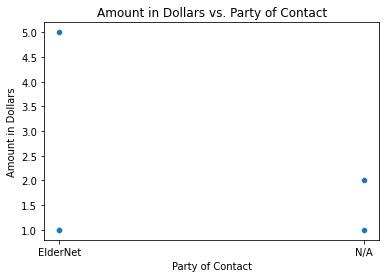

In [208]:
ax = sns.scatterplot(x="InitiatedBy", y="amount", data=client_care_modified)
ax.set_title("Amount in Dollars vs. Party of Contact")
ax.set_xlabel("Party of Contact");
ax.set_ylabel("Amount in Dollars");

In [209]:
#Relationship between Client and Care Management Assistance Category of Care Management, InitiatedBy, and Amount of Assistance 
# and unit of assistance in Care Manage Management?

#JOIN CLIENT INFO AND CARE MANAGEMENT

client_care = pd.merge(client_info, care_management, on="anon_ID")
client_care_modified = client_care.drop(['CommType', 'Party', 'assistance_date', 'Assistance_2', 'Assistance_3', 'Benefit_2', 'Benefit_3'], axis=1)
#client_care_modified = client_care_modified[client_care_modified['Benefit_1'] == 'Eldernet']
client_care_modified.head(10)

,anon_ID,county,poverty,minority,age_group,assistance_category,amount,unit,InitiatedBy,Benefit_1,Assistance_1
0,1,Montgomery,No,N/A,P,"Remote Contact with client (phone, email)",25.0,Minutes,ElderNet,N/A,Enrollment
1,1,Montgomery,No,N/A,P,"Remote Contact with client (phone, email)",2.0,Minutes,N/A,N/A,N/A
2,2,Montgomery,No,No,D,Community,2.0,Minutes,N/A,N/A,N/A
3,2,Montgomery,No,No,D,"Remote Contact with client (phone, email)",1.0,Minutes,N/A,N/A,N/A
4,2,Montgomery,No,No,D,"Remote Contact with client (phone, email)",3.0,Minutes,Eldernet,Eldernet,Coordination
5,3,Montgomery,No,No,P,"Remote Contact with client (phone, email)",4.0,Minutes,N/A,N/A,N/A
6,3,Montgomery,No,No,P,Home Visit,38.0,Minutes,N/A,N/A,N/A
7,3,Montgomery,No,No,P,"Remote Contact with client (phone, email)",7.0,Minutes,N/A,N/A,N/A
8,3,Montgomery,No,No,P,"Remote Contact with client (phone, email)",3.0,Minutes,ElderNet,ElderNet,Support
9,5,Montgomery,No,N/A,G,Community,13.0,Minutes,N/A,N/A,N/A


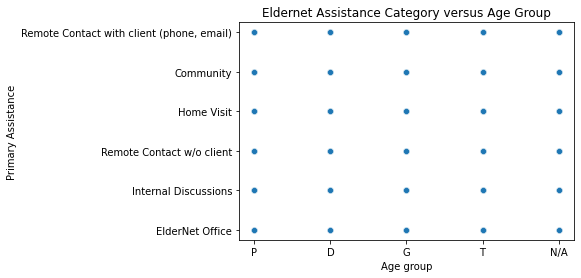

In [210]:
ax = sns.scatterplot(x="age_group", y="assistance_category", data=client_care_modified)
ax.set_title("Eldernet Assistance Category versus Age Group")
ax.set_xlabel("Age group");
ax.set_ylabel("Primary Assistance");

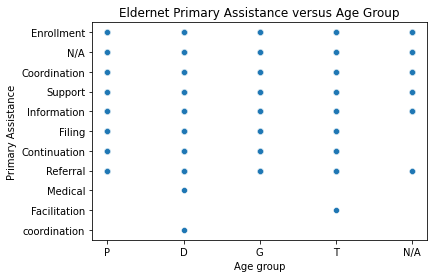

In [211]:
ax = sns.scatterplot(x="age_group", y="Assistance_1", data=client_care_modified)
ax.set_title("Eldernet Primary Assistance versus Age Group")
ax.set_xlabel("Age group");
ax.set_ylabel("Primary Assistance");

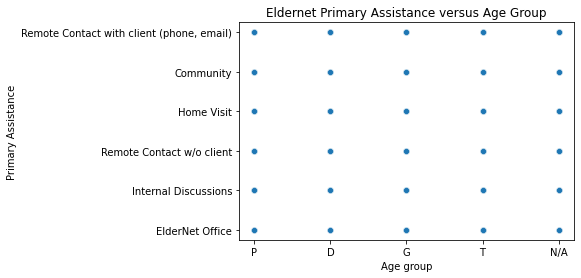

In [212]:
ax = sns.scatterplot(x="age_group", y="assistance_category", data=client_care_modified)
ax.set_title("Eldernet Primary Assistance versus Age Group")
ax.set_xlabel("Age group");
ax.set_ylabel("Primary Assistance");

In [213]:
#JOIN CLIENT INFO AND CARE MANAGEMENT

client_care = pd.merge(client_info, care_management, on="anon_ID")
#client_care.head(10)

#Join client_care and volunteer_services

client_care_volunteer = pd.merge(client_care, volunteer_services, on="anon_ID")
client_care_volunteer.columns
client_care_volunteer_corr = client_care_volunteer.drop(['Benefit_2','Assistance_2', 'Benefit_3', 'Assistance_3','CommType', 'Party', 'InitiatedBy', 'amount', 'unit', 'minority','poverty', 'rider_num_rides'], axis=1)
client_care_volunteer_corr.head(10)

,anon_ID,county,age_group,assistance_date,assistance_category,Benefit_1,Assistance_1,rider_first_ride_date,rider_last_ride_date,appt_date,appt_duration,category,Days
0,2,Montgomery,D,2019-06-04 10:10:00,Community,N/A,N/A,2015-11-10,2021-05-11,5/11/2021,2.0,Doctor Appt,2009
1,2,Montgomery,D,2019-06-04 10:10:00,Community,N/A,N/A,2015-11-10,2021-05-11,5/3/2021,2.0,Doctor Appt,2009
2,2,Montgomery,D,2019-06-04 10:10:00,Community,N/A,N/A,2015-11-10,2021-05-11,4/22/2021,2.0,Doctor Appt,2009
3,2,Montgomery,D,2019-06-04 10:10:00,Community,N/A,N/A,2015-11-10,2021-05-11,4/21/2021,2.0,Doctor Appt,2009
4,2,Montgomery,D,2019-06-04 10:10:00,Community,N/A,N/A,2015-11-10,2021-05-11,4/19/2021,2.0,Doctor Appt,2009
5,2,Montgomery,D,2019-06-04 10:10:00,Community,N/A,N/A,2015-11-10,2021-05-11,4/16/2021,2.0,Doctor Appt,2009
6,2,Montgomery,D,2019-06-04 10:10:00,Community,N/A,N/A,2015-11-10,2021-05-11,4/13/2021,2.0,Doctor Appt,2009
7,2,Montgomery,D,2019-06-04 10:10:00,Community,N/A,N/A,2015-11-10,2021-05-11,4/13/2021,2.0,Doctor Appt,2009
8,2,Montgomery,D,2019-06-04 10:10:00,Community,N/A,N/A,2015-11-10,2021-05-11,4/9/2021,2.0,Doctor Appt,2009
9,2,Montgomery,D,2019-06-04 10:10:00,Community,N/A,N/A,2015-11-10,2021-05-11,4/8/2021,2.0,Doctor Appt,2009


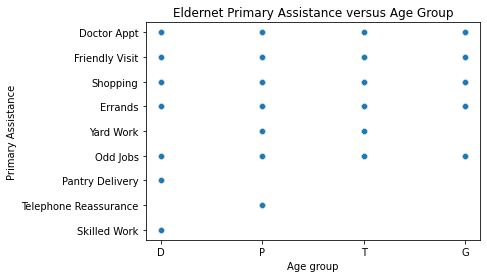

In [214]:
ax = sns.scatterplot(x="age_group", y="category", data=client_care_volunteer)
ax.set_title("Eldernet Primary Assistance versus Age Group")
ax.set_xlabel("Age group");
ax.set_ylabel("Primary Assistance");

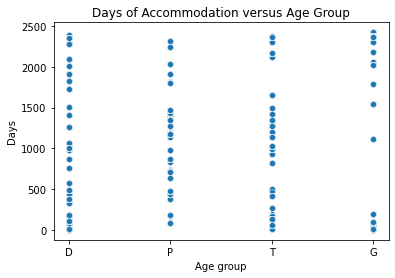

In [216]:
ax = sns.scatterplot(x="age_group", y="Days", data=client_care_volunteer)
ax.set_title("Days of Accommodation versus Age Group")
ax.set_xlabel("Age group");
ax.set_ylabel("Days");

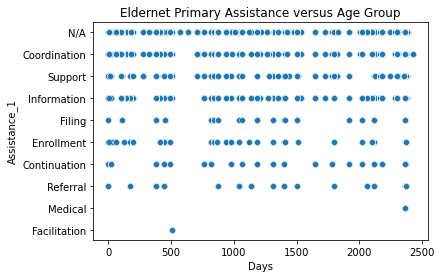

In [217]:
ax = sns.scatterplot(x="Days", y="Assistance_1", data=client_care_volunteer)
ax.set_title("Eldernet Primary Assistance versus Age Group")
ax.set_xlabel("Days");
ax.set_ylabel("Assistance_1");

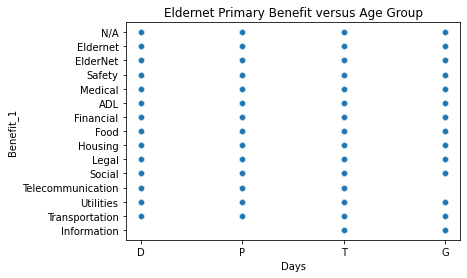

In [220]:
ax = sns.scatterplot(x="age_group", y="Benefit_1", data=client_care_volunteer)
ax.set_title("Eldernet Primary Benefit versus Age Group")
ax.set_xlabel("Days");
ax.set_ylabel("Benefit_1");

In [ ]:
#Question: Which are the markers of success?

#Benefit_3-Safety, Social, Telecommunication, Pets
#Assistance-Support, Coordination
#Volunteer-